In [47]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [5]:
df= pd.read_csv("winequality-red.csv")

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [16]:
df["quality"].value_counts().sort_values()

quality
3     10
8     18
4     53
7    199
6    638
5    681
Name: count, dtype: int64

In [18]:
df['quality'].value_counts(normalize=True) * 100

quality
5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: proportion, dtype: float64

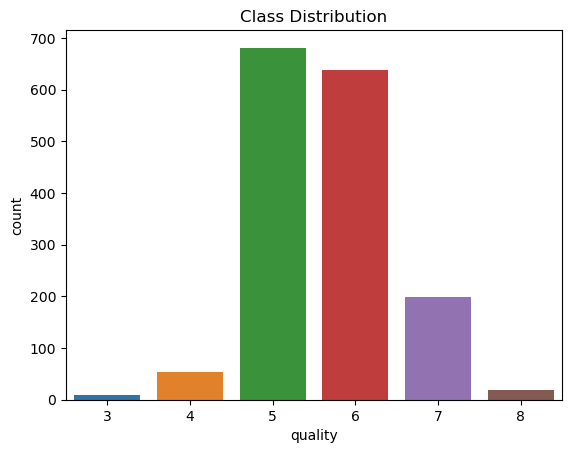

In [22]:
sns.countplot(x='quality', data=df)
plt.title('Class Distribution')
plt.show()

<Axes: xlabel='quality', ylabel='volatile acidity'>

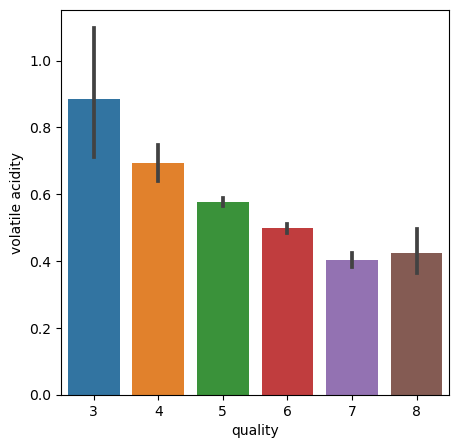

In [25]:
plot = plt.figure(figsize = (5, 5))
sns.barplot(x='quality', y='volatile acidity', data = df)

<Axes: xlabel='quality', ylabel='citric acid'>

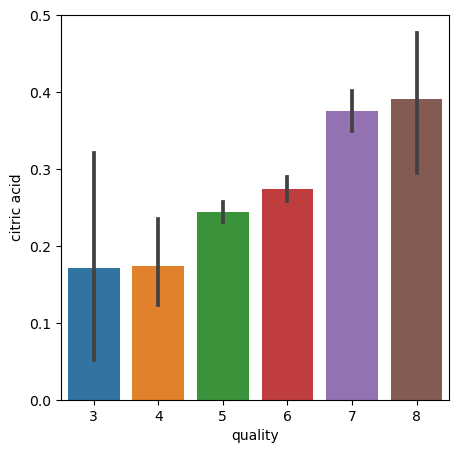

In [26]:
plot = plt.figure(figsize = (5, 5))
sns.barplot(x='quality', y='citric acid', data = df)

In [29]:
correlation = df.corr()

<Axes: >

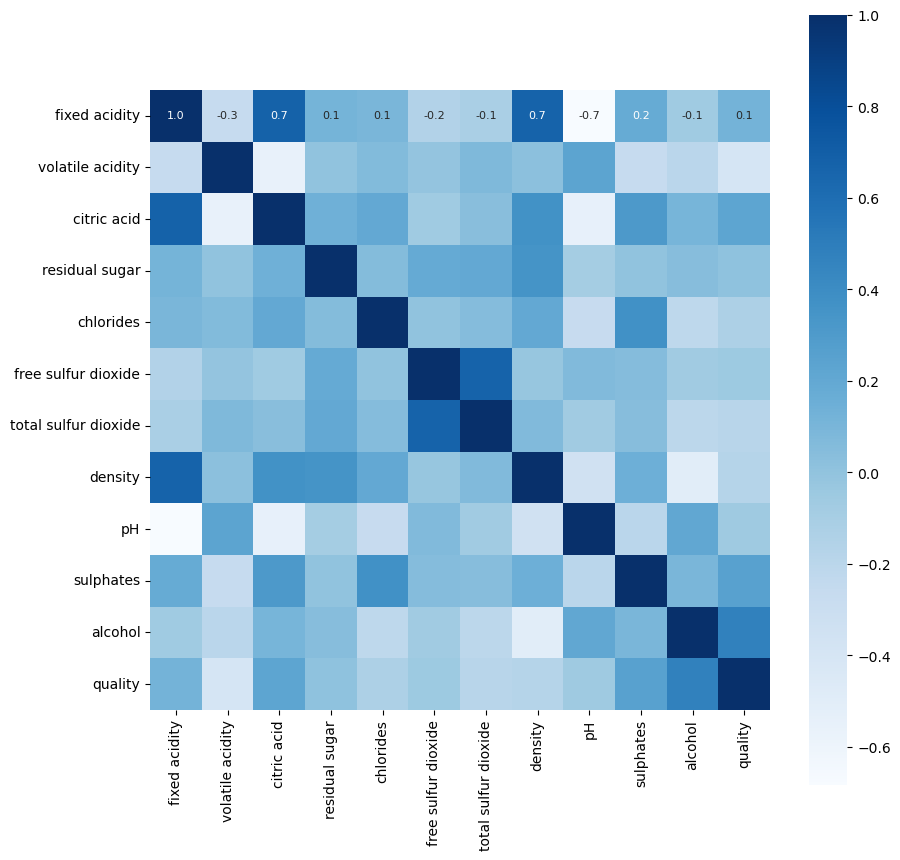

In [30]:
##Finding correlations
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar=True, square = True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [32]:
x = df.drop(columns = 'quality', axis = 1)

In [33]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


**Binirization: turning the values into 2 labels**

In [39]:
Y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [40]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


**Train & Test split**

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2, random_state=42)

In [44]:
model = RandomForestClassifier()

In [45]:
model.fit(x_train, y_train)

RandomForestClassifier()

**Model Evaluation**

In [48]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [49]:
print(test_data_accuracy)

0.9
